In [1]:
import pandas as pd
import numpy as np
import itertools 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import math

import allel

import warnings
warnings.filterwarnings("ignore")

In [2]:
codon_dict={'ttt':'F','ttc':'F','tta':'L','ttg':'L','ctt':'L','ctc':'L','cta':'L','ctg':'L','att':'I','atc':'I',
           'ata':'I','atg':'M','gtt':'V','gtc':'V','gta':'V','gtg':'V','tct':'S','tcc':'S','tca':'S','tcg':'S',
           'cct':'P','ccc':'P','cca':'P','ccg':'P','act':'T','acc':'T','aca':'T','acg':'T','gct':'A','gcc':'A',
           'gca':'A','gcg':'A','tat':'Y','tac':'Y','taa':'STOP','tag':'STOP','cat':'H','cac':'H','caa':'Q',
            'cag':'Q','aat':'N','aac':'N','aaa':'K','aag':'K','gat':'D','gac':'D','gaa':'E','gag':'E','tgt':'C',
            'tgc':'C','tga':'STOP','tgg':'W','cgt':'R','cgc':'R','cga':'R','cgg':'R','agt':'S','agc':'S','aga':'R',
            'agg':'R','ggt':'G','ggc':'G','gga':'G','ggg':'G','a':'a','c':'c','g':'g','t':'t'}

In [ ]:
#input local file path to CRyPTIC tables
file_path='../../cryptic_data_analysis/data_tables/cryptic-analysis-group'

In [4]:
samples = pd.read_pickle("/SAMPLES.pkl.gz")
samples.reset_index(level=2, inplace=True)
samples.reset_index(level=1, inplace=True)
samples.reset_index(level=0, inplace=True)

In [6]:
genomes = pd.read_pickle("../cryptic_data_analysis/data_tables/cryptic-analysis-group/GENOMES.pkl.gz")
genomes.reset_index(level=0, inplace=True)
genomes=genomes.loc[genomes['BELONGS_GPI']==True]
phenotypes = pd.read_pickle("../cryptic_data_analysis/data_tables/cryptic-analysis-group/UKMYC_PHENOTYPES.pkl.gz")
phenotypes.reset_index(level=1, inplace=True)
phenotypes.reset_index(level=0, inplace=True)
phenotypes=phenotypes.loc[phenotypes['BELONGS_GPI']==True]
fq_phenotypes=phenotypes.loc[phenotypes.DRUG.isin(['LEV','MXF'])]
variants=pd.read_csv("hacky-gyrAB-hets/VARIANTS-gyr.csv.gz")
mutations=pd.read_csv("hacky-gyrAB-hets/MUTATIONS.csv.gz")

In [13]:
mutations_het=pd.read_csv("hacky-gyrAB-hets/MUTATIONS.csv.gz")
mutations_het.loc[(mutations_het.IS_FILTER_PASS==False)&(mutations_het.UNIQUEID.isin(fq_phenotypes.UNIQUEID.to_list()))]

,UNIQUEID,GENE,MUTATION,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,...,IS_HET,IS_NULL,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID,NUMBER_NUCLEOTIDE_CHANGES
7429,site.02.subj.0271.lab.2014232014.iso.1,gyrA,D94O,94.0,94.0,NaN,NaN,gac,goc,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,2,1
13499,site.02.subj.0071.lab.22A022.iso.1,gyrA,S91O,91.0,91.0,NaN,NaN,tcg,ocg,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,2,1
13500,site.02.subj.0071.lab.22A022.iso.1,gyrA,D94O,94.0,94.0,NaN,NaN,gac,goc,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,2,1
14496,site.02.subj.0031.lab.2014234024.iso.1,gyrA,L197O,197.0,197.0,NaN,NaN,ctg,cto,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,2,1
14819,site.02.subj.0491.lab.231014-15.iso.1,gyrA,A90O,90.0,90.0,NaN,NaN,gcg,gog,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439517,site.20.subj.SA00403702.lab.YA00135281.iso.1,gyrA,S95O,95.0,95.0,NaN,NaN,agc,occ,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,20,2
1439605,site.20.subj.SCH8373923.lab.YA00134600.iso.1,gyrA,S95O,95.0,95.0,NaN,NaN,agc,occ,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,20,2
1439998,site.20.subj.SA00377494.lab.YA00135266.iso.1,gyrA,R252O,252.0,252.0,NaN,NaN,cga,coa,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,20,1
1440037,site.20.subj.SA00377494.lab.YA00135266.iso.1,gyrB,P94O,94.0,94.0,NaN,NaN,ccg,cog,True,...,False,False,False,GENE,AAM,NaN,NaN,NaN,20,1


In [15]:
pm=pd.merge(fq_phenotypes, variants, how='left', on=['UNIQUEID'])
pm_het=pm.loc[(pm.ALT=='o')]

In [37]:
#generate .csv file of .vcf files to interrogate
#/well/bag/pfowler/cryptic/dat/CRyPTIC2/V2/04/00101/629761/1/regenotyped
filestrings=[]
loc_string=[]
gi=[]
ref=[]
alt=[]
mut=[]
gene=[]
u=[]
for i in pm_het.UNIQUEID.unique():
    for ii in pm_het.loc[(pm_het.UNIQUEID==i)].VARIANT.unique():
        p=pm_het.loc[(pm_het.UNIQUEID==i)&(pm_het.VARIANT==ii)].POSITION.to_list()[0]
        g=pm_het.loc[(pm_het.UNIQUEID==i)&(pm_het.VARIANT==ii)].GENE.to_list()[0]
        gene.append(g)
        ref.append(pm_het.loc[(pm_het.UNIQUEID==i)&(pm_het.VARIANT==ii)].REF.to_list()[0])
        alt.append(pm_het.loc[(pm_het.UNIQUEID==i)&(pm_het.VARIANT==ii)].ALT.to_list()[0])
        gi.append(pm_het.loc[(pm_het.POSITION==p)&(pm_het.GENE==g)&(pm_het.UNIQUEID==i)&(pm_het.VARIANT==ii)].GENOME_INDEX.to_list()[0])
        u.append(i)
        mut.append(ii)
        filestrings.append('../../pfowler/cryptic/dat/CRyPTIC2/V2/'+i.split('.')[1]+'/'+i.split('.')[3]+'/'+i.split('.')[5]+'/'+i.split('.')[7]+'/regenotyped/'+i+'.v0.8.3.regenotyped.vcf.gz')
        loc_string.append(i+'.v0.8.3.regenotyped.vcf.gz')
hets_df = pd.DataFrame({'UNIQUEID':u,
                    'VCF_FILE':filestrings,
                    'LOC_STRING':loc_string,
                    'GENE':gene, 
                    'MUTATION':mut, 
                    'REF':ref, 
                    'ALT':alt, 
                    'GENOME_INDEX':gi})

hets_df.to_csv('gyrase_het_muts.csv')                    
                    

(array([ 48050.,  16483.,   7260.,  37701.,  44977.,  24534., 342809.,
        180058., 201122., 362719.]),
 array([  8. ,  31.3,  54.6,  77.9, 101.2, 124.5, 147.8, 171.1, 194.4,
        217.7, 241. ]),
 <BarContainer object of 10 artists>)

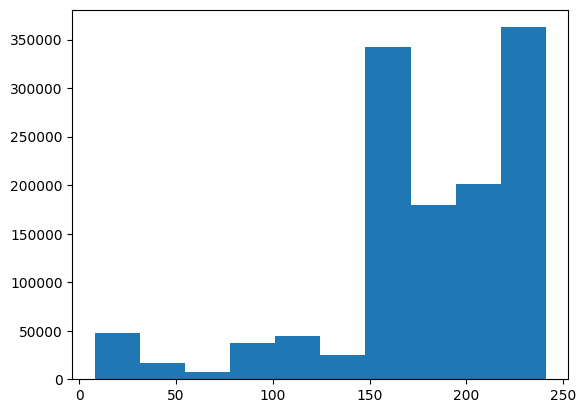

In [135]:


def list_sum(mylist):
    s = 0
    for x in mylist:
        if x > 0:
            s = s + x
    return s


variants=[]
reads=[]
frs=[]
frs_fail=[]
dp_fail=[]
gcp_fail=[]
highest_alt=[]
a=[]
c=[]
g=[]
t=[]

callset = allel.read_vcf('site.05.subj.LS-1046.lab.LS-10565-18.iso.1.v0.8.3.regenotyped.vcf.gz', 
                         fields=['calldata/COV',
         'calldata/DP',
         'calldata/DPF',
         'calldata/FRS',
         'calldata/GT',
         'calldata/GT_CONF',
         'calldata/GT_CONF_PERCENTILE',
         'variants/ALT',
         'variants/CHROM',
         'variants/FILTER_MIN_DP',
         'variants/FILTER_MIN_FRS',
     'variants/FILTER_MIN_GCP',
     'variants/FILTER_PASS',
     'variants/FILTER_mask-compass',
     'variants/ID',
     'variants/POS',
     'variants/QUAL',
     'variants/REF',
     'variants/altlen',
     'variants/is_snp',
     'variants/numalt'])

pos=[]
reads=[]

for i in callset['calldata/DP']:
        if callset['calldata/DP'][i][0]>0:
            reads.append(callset['calldata/DP'][i][0][0])





plt.hist(reads, bins=10) 

In [193]:
#hets_variants=pd.merge(hets, variants, how='left', on=['UNIQUEID','GENOME_INDEX'])

In [16]:
#read in completed csv file from interrogation of .vcfs
hets=pd.read_csv('gyrase_het_muts_complete.csv')


In [17]:

depth_list=[]
for i in hets['DP'].astype('str'):
    if i != 'nan':
        depth_list.append(int(i[1:-1]))
    else:
        depth_list.append(np.nan)
depth_list
hets['DP']=depth_list

In [18]:
alt_n=[]
ref_n=[]
for ind, row in hets.iterrows():    
    if row['HIGHEST_ALT']=='a':
        alt_n.append(round(row['%_a']*row['DP'],0))
    elif row['HIGHEST_ALT']=='c':
        alt_n.append(round(row['%_c']*row['DP'],0))
    elif row['HIGHEST_ALT']=='g':
        alt_n.append(round(row['%_g']*row['DP'],0))
    elif row['HIGHEST_ALT']=='t':
        alt_n.append(round(row['%_t']*row['DP'],0))
    else:
        alt_n.append(np.nan)
for ind, row in hets.iterrows():    
    if row['REF']=='a':
        ref_n.append(round(row['%_a']*row['DP'],0))
    elif row['REF']=='c':
        ref_n.append(round(row['%_c']*row['DP'],0))
    elif row['REF']=='g':
        ref_n.append(round(row['%_g']*row['DP'],0))
    elif row['REF']=='t':
        ref_n.append(round(row['%_t']*row['DP'],0))
    else:
        ref_n.append(np.nan)

hets['ALT_N_READS']=alt_n
hets['REF_N_READS']=ref_n
        


In [19]:
hets['FRS_ALT']=hets.ALT_N_READS/hets.DP
#remove mutations where alt or reference fail DP filter
hets_2=hets.loc[(hets.DP_FAIL==False)]

In [20]:
hets_2p=pd.merge(hets_2, variants, on=['UNIQUEID','GENOME_INDEX'])

In [21]:
list0=[]
i=7302
while i < 9819:
    list0.append(i)
    i += 3
    
list1=[]
i=7303
while i < 9819:
    list1.append(i)
    i += 3
    
list2=[]
i=7304
while i < 9819:
    list2.append(i)
    i += 3
    
gyra_codon_position_dict={0:list0,
                   1:list1,
                   2:list2}

In [22]:
list0=[]
i=5240
while i < 7268:
    list0.append(i)
    i += 3
    
list1=[]
i=5241
while i < 7268:
    list1.append(i)
    i += 3
    
list2=[]
i=5242
while i < 7268:
    list2.append(i)
    i += 3
    
gyrb_codon_position_dict={0:list0,
                   1:list1,
                   2:list2}

In [41]:
hets_2p=hets_2p.loc[hets_2p.IN_PROMOTER==False]
uid=[]
alt_reads=[]
ref_codon=[]
new_codon=[]
depth=[]
gene=[]
pos=[]
frs=[]
for ind, row in hets_2p.iterrows():
    rc=mutations_het.loc[(mutations_het.POSITION==row['POSITION'])&(mutations_het.GENE==row['GENE_x'])&(mutations_het.IS_SNP==True)].REF.to_list()[0]
    if row['GENE_x']=='gyrA':
        if row['GENOME_INDEX'] in gyra_codon_position_dict[0]:
            x=0
        elif row['GENOME_INDEX'] in gyra_codon_position_dict[1]:
            x=1
        elif row['GENOME_INDEX'] in gyra_codon_position_dict[2]:
            x=2
    elif row['GENE_x']=='gyrB':
        if row['GENOME_INDEX'] in gyrb_codon_position_dict[0]:
            x=0
        elif row['GENOME_INDEX'] in gyrb_codon_position_dict[1]:
            x=1
        elif row['GENOME_INDEX'] in gyrb_codon_position_dict[2]:
            x=2

    #print(ref)
    if round(row['%_a']*row['DP_x'],0)>=2 and row['REF_x']!='a' and row['%_a']<0.9:
        uid.append(row['UNIQUEID'])
        gene.append(row['GENE_x'])
        pos.append(row['POSITION'])
        ac=rc[:x] + 'a' + rc[x + 1:]
        new_codon.append(ac)
        ref_codon.append(rc)
        alt_reads.append(round(row['%_a']*row['DP_x'],0))
        depth.append(row['DP_x'])
        frs.append(row['%_a'])
    if round(row['%_c']*row['DP_x'],0)>=2 and row['REF_x']!='c' and row['%_c']<0.9:
        uid.append(row['UNIQUEID'])
        gene.append(row['GENE_x'])
        pos.append(row['POSITION'])
        ac=rc[:x] + 'c' + rc[x + 1:]
        new_codon.append(ac)
        ref_codon.append(rc)
        alt_reads.append(round(row['%_c']*row['DP_x'],0))
        depth.append(row['DP_x'])
        frs.append(row['%_c'])
    if round(row['%_g']*row['DP_x'],0)>=2 and row['REF_x']!='g' and row['%_g']<0.9:
        uid.append(row['UNIQUEID'])
        gene.append(row['GENE_x'])
        pos.append(row['POSITION'])
        ac=rc[:x] + 'g' + rc[x + 1:]
        new_codon.append(ac)
        ref_codon.append(rc)
        alt_reads.append(round(row['%_g']*row['DP_x'],0))
        depth.append(row['DP_x'])
        frs.append(row['%_g'])
    if round(row['%_t']*row['DP_x'],0)>=2 and row['REF_x']!='t' and row['%_t']<0.9:
        uid.append(row['UNIQUEID'])
        gene.append(row['GENE_x'])
        pos.append(row['POSITION'])
        ac=rc[:x] + 't' + rc[x + 1:]
        new_codon.append(ac)
        ref_codon.append(rc)
        alt_reads.append(round(row['%_t']*row['DP_x'],0))
        depth.append(row['DP_x'])
        frs.append(row['%_t'])
        
    
final_hets_df=pd.DataFrame(list(zip(uid,gene,pos,ref_codon,new_codon,alt_reads,depth,frs)),
                           columns=['UNIQUEID','GENE','POSITION','REF_CODON','ALT_CODON','ALT_READS','DEPTH','FRS'])

mutation=[]
for ind, row in final_hets_df.iterrows():
    mutation.append(row['GENE']+codon_dict[row['REF_CODON']]+str(int(row['POSITION']))+codon_dict[row['ALT_CODON']])
    
final_hets_df['HET_MUTATION']=mutation
final_hets_df.to_csv('het_mutations_dp2.csv')
final_hets_df

,UNIQUEID,GENE,POSITION,REF_CODON,ALT_CODON,ALT_READS,DEPTH,FRS,HET_MUTATION
0,site.06.subj.RLH_0295-14.lab.06MIL0281.iso.1,gyrA,124.0,ccg,gcg,2.0,11.0,0.181818,gyrAP124A
1,site.10.subj.YA00026185.lab.YA00026185.iso.1,gyrA,254.0,cgc,tgc,12.0,114.0,0.105263,gyrAR254C
2,site.06.subj.OIC-1182.lab.06MIL1094.iso.1,gyrA,123.0,cca,ccc,3.0,36.0,0.085714,gyrAP123P
3,site.06.subj.06TB_0280.lab.06MIL0871.iso.1,gyrA,696.0,gcc,acc,2.0,18.0,0.111111,gyrAA696T
4,site.06.subj.AF11681.lab.06MIL1559.iso.1,gyrB,436.0,ggt,ggc,5.0,50.0,0.100000,gyrBG436G
...,...,...,...,...,...,...,...,...,...
1213,site.08.subj.02TB0158.lab.17101.iso.1,gyrA,473.0,gag,gaa,4.0,17.0,0.235294,gyrAE473E
1214,site.08.subj.02TB0158.lab.17101.iso.1,gyrA,474.0,cgg,cgt,4.0,15.0,0.266667,gyrAR474R
1215,site.08.subj.02TB0158.lab.17101.iso.1,gyrA,476.0,cgt,cgc,4.0,15.0,0.266667,gyrAR476R
1216,site.08.subj.02TB0158.lab.17101.iso.1,gyrA,477.0,ggg,gcg,4.0,15.0,0.266667,gyrAG477A


In [92]:
lev_p=pd.merge(fq_phenotypes.loc[fq_phenotypes.DRUG=='LEV'], final_hets_df, on='UNIQUEID', how='left')
mxf_p=pd.merge(fq_phenotypes.loc[fq_phenotypes.DRUG=='MXF'], final_hets_df, on='UNIQUEID', how='left')

In [93]:
l_r_tot=lev_p.loc[(lev_p.BINARY_PHENOTYPE=='R')].UNIQUEID.nunique()
l_r_het=lev_p.loc[-(lev_p.HET_MUTATION.isna())&(lev_p.BINARY_PHENOTYPE=='R')].UNIQUEID.nunique()

l_s_tot=lev_p.loc[(lev_p.BINARY_PHENOTYPE=='S')].UNIQUEID.nunique()
l_s_het=lev_p.loc[-(lev_p.HET_MUTATION.isna())&(lev_p.BINARY_PHENOTYPE=='S')].UNIQUEID.nunique()

In [94]:
m_r_tot=mxf_p.loc[(mxf_p.BINARY_PHENOTYPE=='R')].UNIQUEID.nunique()
m_r_het=mxf_p.loc[-(mxf_p.HET_MUTATION.isna())&(mxf_p.BINARY_PHENOTYPE=='R')].UNIQUEID.nunique()

m_s_tot=mxf_p.loc[(mxf_p.BINARY_PHENOTYPE=='S')].UNIQUEID.nunique()
m_s_het=mxf_p.loc[-(mxf_p.HET_MUTATION.isna())&(mxf_p.BINARY_PHENOTYPE=='S')].UNIQUEID.nunique()

In [97]:
def z_test(sample_success_a, sample_size_a, sample_success_b, sample_size_b):
    # can we assume anything from our sample
    significance = 0.05

    # check our sample against Ho for Ha != Ho
    successes = np.array([sample_success_a, sample_success_b])
    samples = np.array([sample_size_a, sample_size_b])
    # note, no need for a Ho value here - it's derived from the other parameters
    stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')
    # report
    print('z_stat: %0.5f, p_value: %0.5f' % (stat, p_value))
    #if p_value > significance:
        #print ("Fail to reject the null hypothesis - we have nothing else to say")
    #else:
        #print ("Reject the null hypothesis - suggest the alternative hypothesis is true")
    return p_value

In [99]:
import statsmodels
from statsmodels.stats.proportion import proportions_ztest
z_test(m_r_het, m_r_tot, m_s_het, m_r_tot)

z_test(l_r_het, l_r_tot, l_s_het, l_r_tot)

z_stat: -8.86949, p_value: 0.00000
z_stat: -4.11914, p_value: 0.00004


3.8029021254416194e-05

z_stat: -4.11914, p_value: 0.00004
z_stat: -8.86949, p_value: 0.00000


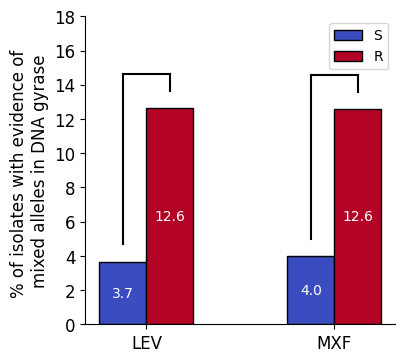

In [115]:

#plt.bar(unique(mut_counts).astype('str'),counts)
fig, ax = plt.subplots(figsize=(4,4))
labels = ['LEV','MXF']
s=[(l_s_het/l_s_tot)*100, (m_s_het/m_s_tot)*100]
r=[(l_r_het/l_r_tot)*100, (m_r_het/m_r_tot)*100]
z=[]
    
z.append(z_test(l_r_het, l_r_tot, l_s_het, l_r_tot))
z.append(z_test(m_r_het, m_r_tot, m_s_het, m_r_tot))
    
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
    

#rects1 = ax.bar(x - width, FQ, width, label='Fluoroquinolone Resistant', color='#bc5090',edgecolor='k')
rects2 = ax.bar(x - width/2, s, width, label='S', color='#3b4cc0', edgecolor='black')
rects3 = ax.bar(x + width/2, r, width, label='R', color='#b40426',edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of isolates with evidence of \nmixed alleles in DNA gyrase', size=12)
ax.set_xticks(x)
ax.set_ylim(0,18)
ax.bar_label(rects2, fmt='%.1f', label_type='center', color='w')
ax.bar_label(rects3, fmt='%.1f', label_type='center', color='w')
    


if z[0]<=0.05:
    plt.plot([x[0]-width/2, x[0]+width/2], [r[0]+2, r[0]+2],color="k")
    plt.plot([x[0]-width/2, x[0]-width/2], [s[0]+1, r[0]+2],color="k")
    plt.plot([x[0]+width/2, x[0]+width/2], [r[0]+1, r[0]+2],color="k")
if z[1]<=0.05:
    plt.plot([x[1]-width/2, x[1]+width/2], [r[1]+2, r[1]+2],color="k")
    plt.plot([x[1]-width/2, x[1]-width/2], [s[1]+1, r[1]+2],color="k")
    plt.plot([x[1]+width/2, x[1]+width/2], [r[1]+1, r[1]+2],color="k")

for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
ax.set_xticklabels(labels)
ax.legend(loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('r_vs_s_mixed_alleles.png',dpi=300, transparent=True, bbox_inches='tight')

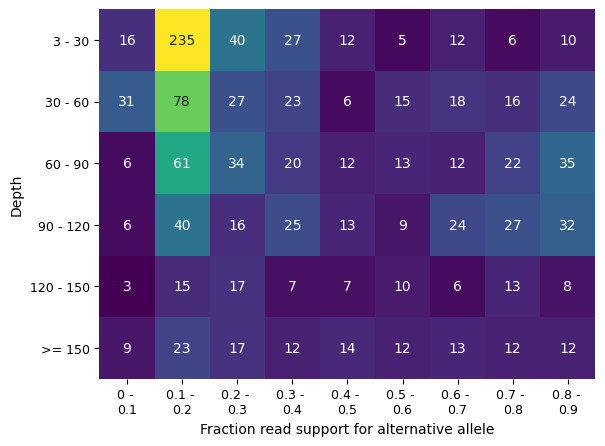

In [723]:
#group fraction read support and depth
final_hets_df['ALT_FRS_grouped']=pd.cut(np.array(final_hets_df.FRS), pd.IntervalIndex.from_tuples(
                            [(0, 0.1), (0.1,0.2), (0.2, 0.3), (0.3,0.4),(0.4,0.5),(0.5,0.6),
                             (0.6,0.7),(0.7,0.8),(0.8,0.9)]))
final_hets_df['DEPTH_grouped']=pd.cut(np.array(final_hets_df.DEPTH), bins= pd.IntervalIndex.from_tuples(
                            [(0, 30),(30,60), (60,90), (90,120), (120,150),  (150, 1000)]))
#pivot table for heatmap
x=final_hets_df['ALT_FRS_grouped'].to_list()
y=final_hets_df['DEPTH_grouped'].to_list()
df = pd.DataFrame([x,y]).T
df.columns=['ALT_FRS','DEPTH']
df['count'] = 1
df2 = df.groupby(['ALT_FRS','DEPTH'], as_index=False).count()
df_p = pd.pivot_table(df2,'count','DEPTH','ALT_FRS')
#heatmap
fig, ax = plt.subplots()
ax=sns.heatmap(df_p, cmap='viridis', annot=True, fmt='.0f', vmax=100, cbar=False)
ax.set_xticklabels(['0 - \n0.1', '0.1 - \n0.2', '0.2 - \n0.3', '0.3 - \n0.4','0.4 - \n0.5',
                   '0.5 - \n0.6', '0.6 - \n0.7', '0.7 - \n0.8','0.8 - \n0.9'], rotation=0, size=9)
ax.set_yticklabels(['3 - 30', '30 - 60', '60 - 90', '90 - 120','120 - 150',
                   '>= 150'], rotation=0, size=9)
plt.ylabel('Depth')
plt.xlabel('Fraction read support for alternative allele')
plt.savefig('FRSvDEPTH_heatmap.png', dpi=300, transparent=True, bbox_inches='tight')

In [731]:
drug_dict={'LEV':'Levofloxacin','MXF':'Moxifloxacin'}

In [732]:
def frs_distplot(mutation, drug):
    '''make MIC vs FRS distribution plots and calculate pearsons r correlation coefficient'''
    
    
    import seaborn as sns


    hets_mic=pd.merge(final_hets_df, fq_phenotypes, how='left', on='UNIQUEID')
    hets_mic=hets_mic.loc[(hets_mic.DRUG==drug)&(hets_mic.PHENOTYPE_QUALITY!='LOW')&(hets_mic.HET_MUTATION==mutation)]



    variant_logmic=[]
    variant_frs=[]

    for i in hets_mic['LOG2MIC'].to_list(): 
        variant_logmic.append(i)
    for i in hets_mic['FRS'].to_list(): 
        variant_frs.append(i)

    
    d = {'LOG2MIC':variant_logmic,'FRS_ALT':variant_frs}
    df=pd.DataFrame(d)
    df=df.loc[df.FRS_ALT<0.9]
    df=df.round({'FRS_ALT': 1})
    print(df)
    fig, ax = plt.subplots(figsize=(df.FRS_ALT.nunique()/1.5,4))

    props = dict(linestyle='-', linewidth=0.5)

    if len(df.loc[df.FRS_ALT==0.0])>0:
        bp=sns.swarmplot(x = "FRS_ALT", y = "LOG2MIC",data = df, color = 'k')
    else:
        bp=sns.swarmplot(x = "FRS_ALT", y = "LOG2MIC",data = df, color = 'k')
        
    bp=sns.violinplot(x = "FRS_ALT", y = "LOG2MIC",data = df, color = 'lightgray',inner=None, scale='count')            

    
    bp.set_ylabel(drug_dict[drug]+' MIC')
    bp.set_xlabel('Fraction read support for '+mutation[0:4]+' '+mutation[4:])
    plt.suptitle("")
    plt.title("")
    if drug=='MXF':
        plt.yticks(df.LOG2MIC.sort_values().dropna().unique(), 
               ['<=0.06','0.12','0.25','0.5','1','2','4','>4'], rotation=0)
    elif drug=='LEV':
        plt.yticks(df.LOG2MIC.sort_values().dropna().unique(), 
               ['<=0.12','0.25','0.5','1','2','4','8', '>8'], rotation=0)

    for pos in ['right', 'top']: 
        plt.gca().spines[pos].set_visible(False) 
    
    axes = plt.gca()
    


    y_min, y_max = axes.get_ylim()
    x_min, x_max = axes.get_xlim()
    
    axes.text(x_max-1, y_min+0.5, 'R = '+str(round(df['FRS_ALT'].corr(df['LOG2MIC']),3)))


    plt.savefig('FRSvMIC_box_'+mutation+'_'+drug+'.png', dpi=300, transparent=True, bbox_inches='tight')




    LOG2MIC  FRS_ALT
0      1.00      0.1
1      1.00      0.1
2      2.00      0.7
3       NaN      0.8
4      1.00      0.7
..      ...      ...
67     3.00      0.9
68    -3.06      0.7
69     2.00      0.3
70     2.00      0.5
71     4.00      0.2

[72 rows x 2 columns]
     LOG2MIC  FRS_ALT
0        3.0      0.1
1        2.0      0.3
2        3.0      0.8
3        3.0      0.2
4        4.0      0.3
..       ...      ...
101      3.0      0.8
102      3.0      0.8
103      2.0      0.8
104      4.0      0.7
105      4.0      0.1

[106 rows x 2 columns]
    LOG2MIC  FRS_ALT
0     -1.00      0.1
1       NaN      0.8
2      2.00      0.9
3      3.00      0.3
4      3.00      0.9
..      ...      ...
64    -2.00      0.3
65    -4.06      0.7
66     2.00      0.3
67     2.00      0.5
68     3.00      0.2

[69 rows x 2 columns]
    LOG2MIC  FRS_ALT
0       2.0      0.1
1       2.0      0.8
2       3.0      0.2
3       3.0      0.3
4       2.0      0.1
..      ...      ...
94      3.0    

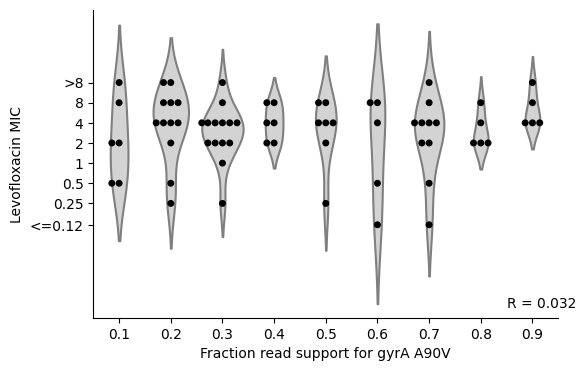

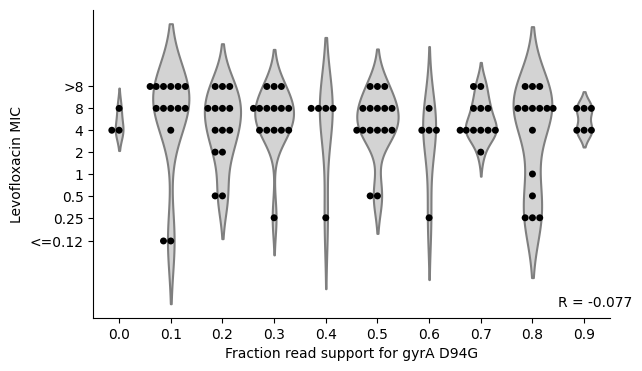

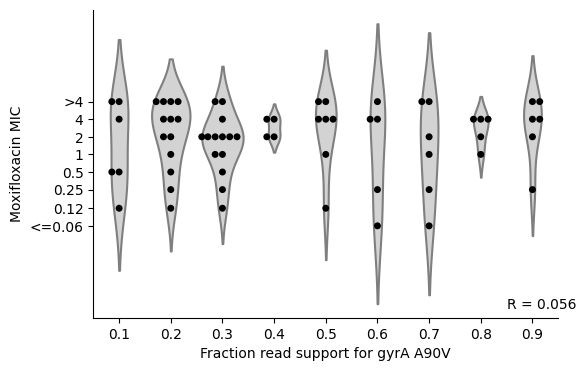

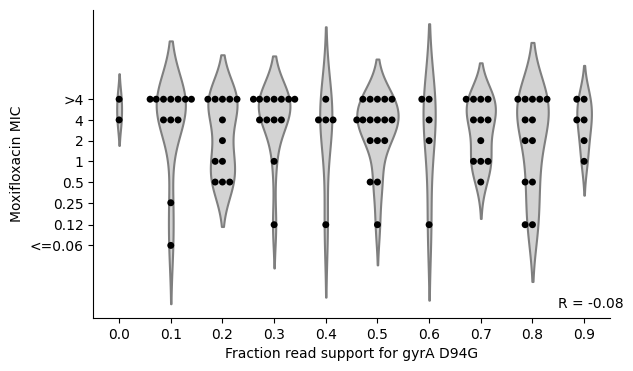

In [733]:
frs_distplot('gyrAA90V', 'LEV')
frs_distplot('gyrAD94G', 'LEV')
frs_distplot('gyrAA90V', 'MXF')
frs_distplot('gyrAD94G', 'MXF')